# Load libraries

In [1]:
import pandas as pd

import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Read data

In [2]:
df = pd.read_csv('../data/prepared_data.csv')

In [3]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [4]:
1 - 339/9661

0.9649104647552014

# Data analysis 

In [5]:
fig = px.histogram(df, x="Machine failure",color='Machine failure')
fig.show()

In [6]:
fig = make_subplots(rows=2, cols=3,subplot_titles = df.drop(
    columns = ['Machine failure',
               'Type_H',
               'Type_L',
               'Type_M']).columns)
row = 1
column = 1

for count, col in enumerate(df.drop(columns = ['Machine failure',
                                               'Type_H','Type_L',
                                               'Type_M']).columns):
  data1 = df[df['Machine failure'] == 0][col]
  data2 = df[df['Machine failure'] == 1][col]
  
  if count != 0:
    trace1 = go.Box(y=data1, marker=dict(color='blue'),name = 'No failure',
                    showlegend=False)
    trace2 = go.Box(y=data2, marker=dict(color='red'),name = 'Machine failure',
                    showlegend=False)
  else:
    trace1 = go.Box(y=data1, marker=dict(color='blue'),name = 'No failure')
    trace2 = go.Box(y=data2, marker=dict(color='red'),name = 'Machine failure')

  fig.add_trace(trace1, row=row, col=column)
  fig.add_trace(trace2, row=row, col=column)

  if column == 3:
    column=0
    row += 1
  column += 1

fig.update_layout(height=800, width=1200, title='Comparing all features by Machine failure')
fig.show()

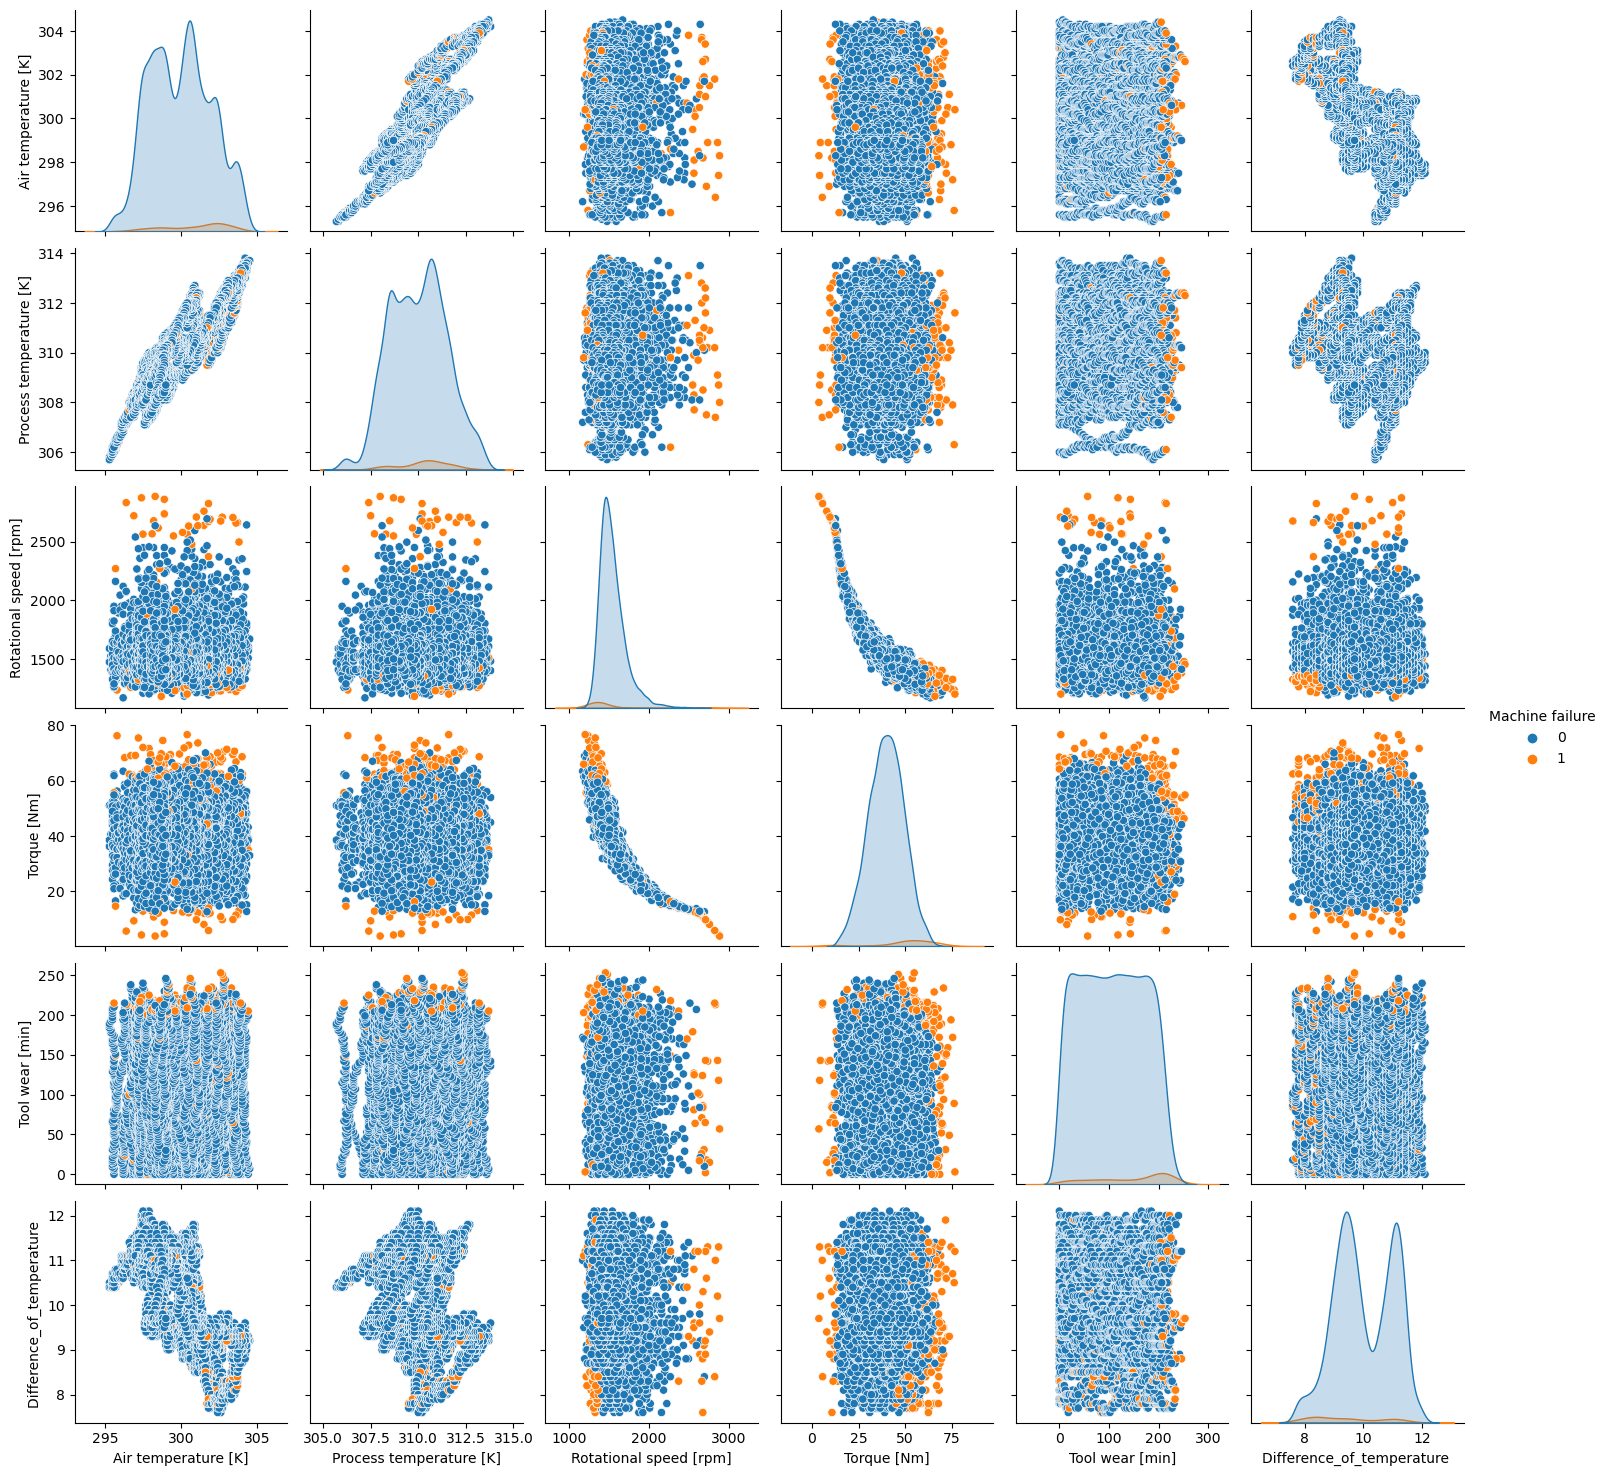

In [7]:
sns.pairplot(df.drop(columns = ['Type_H','Type_L','Type_M']),
             hue="Machine failure")